(chapter13_part2)=

# Evaluation Metrics for Classification

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it.


This notebook is a supplement for *Chapter 13. Model Evaluation* of **Machine Learning For Everyone** book.

This script covers a comprehensive evaluation for both a binary classifier and a multi-class classifier.


## 1. Required Libraries

This block imports all necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score,
                             f1_score, fbeta_score, roc_auc_score, roc_curve, precision_recall_curve,
                             log_loss)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## 2. Model Evaluation for Binary Classifier

Let's first generate a Hypothetical Dataset and split it into train and test sets.

In [2]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Let's now train a binary classifier using Random Forest.

In [3]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]  # Score for ROC and precision-recall

After that, we can proceed with model evaluation.

### 2.1. Confusion Matrix

In [4]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[107   8]
 [ 22 113]]


### 2.2. Calculating Accuracy, Precision, and Recall

In [5]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.88
Precision: 0.9338842975206612
Recall: 0.837037037037037


### 2.3. Plotting Precision-Recall Curve

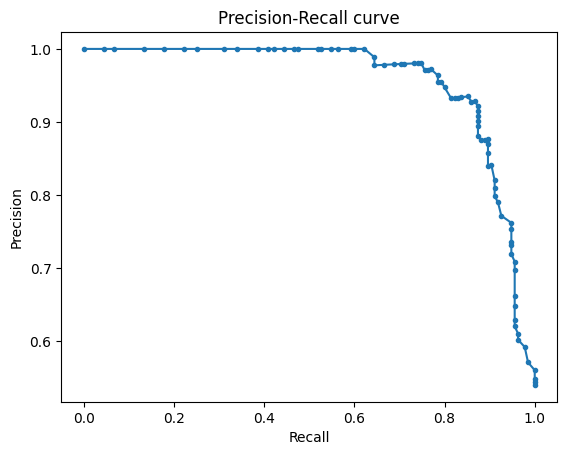

In [6]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

### 2.4. Calculating F1 Score, F0.5, and F2 Scores

In [7]:
f1 = f1_score(y_test, y_pred)
f0_5 = fbeta_score(y_test, y_pred, beta=0.5)
f2 = fbeta_score(y_test, y_pred, beta=2)
print("F1 Score:", f1)
print("F0.5 Score:", f0_5)
print("F2 Score:", f2)

F1 Score: 0.8828125
F0.5 Score: 0.9127625201938611
F2 Score: 0.8547655068078669


### 2.5. Calculating ROC AUC

In [8]:
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC:", roc_auc)

ROC AUC: 0.9337520128824477


### 2.6. Visualizing ROC Curve

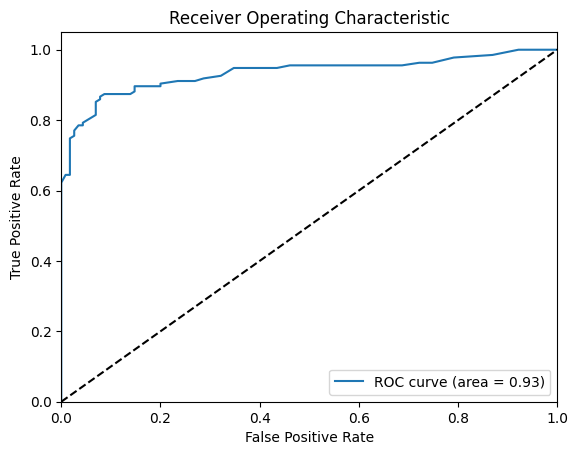

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 2.7. Calculating Logarithmic Loss

In [10]:
logloss = log_loss(y_test, y_scores)
print("Logarithmic Loss:", logloss)

Logarithmic Loss: 0.33230804473299996


## 3. Model Evaluation for Multiclass Classifier

Let's first generate a Hypothetical Dataset and split it into train and test sets.

In [11]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Let's now train a binary classifier using Random Forest.

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)  # Scores for each class

After that, we can proceed with model evaluation.

### 3.1. Confusion Matrix

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[73  5  8]
 [ 8 67  1]
 [ 3  0 85]]


### 3.2. Calculating Accuracy

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


### 3.3. Calculating Precision, Recall, and F1 Score (Macro and Micro)

In [15]:
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')

print("Precision Macro:", precision_macro)
print("Precision Micro:", precision_micro)
print("Recall Macro:", recall_macro)
print("Recall Micro:", recall_micro)
print("F1 Score Macro:", f1_macro)
print("F1 Score Micro:", f1_micro)

Precision Macro: 0.9012861645840369
Precision Micro: 0.9
Recall Macro: 0.8987750825266124
Recall Micro: 0.9
F1 Score Macro: 0.8994316229610347
F1 Score Micro: 0.9


### 3.4. Calculating ROC AUC for Multiclass

One-versus-rest approach is often used for multiclass ROC AUC calculations.

In [16]:
roc_auc = roc_auc_score(y_test, y_scores, multi_class='ovr')
print("ROC AUC (One-vs-Rest):", roc_auc)

ROC AUC (One-vs-Rest): 0.9787848549290001


### 3.5. Visualizing Precision-Recall Curve (for each class)

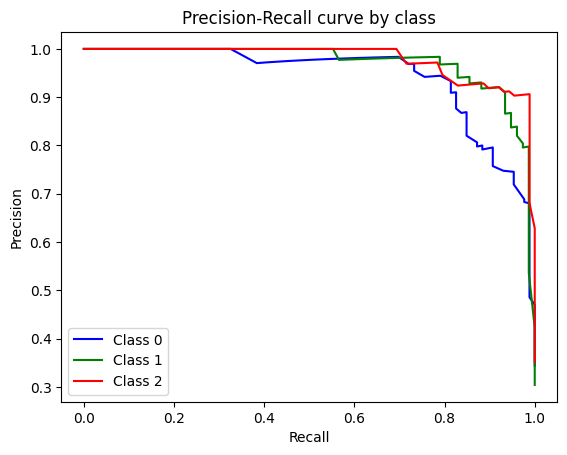

In [17]:
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in enumerate(colors):
    precision, recall, _ = precision_recall_curve(y_test == i, y_scores[:, i])
    plt.plot(recall, precision, color=color, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve by class')
plt.legend(loc="best")
plt.show()

### 3.6 Calculating Logarithmic Loss

In [18]:
logloss = log_loss(y_test, y_scores)
print("Logarithmic Loss:", logloss)

Logarithmic Loss: 0.28576347304315963
